<a href="https://colab.research.google.com/github/nicolegold/AnalistaMachineLearning/blob/master/Desafio1_FAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos

In [2]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [0]:
#lendo o dataset no formato de um dataframe através da função read do pandas
nome_do_arquivo="comp_bikes_mod.csv"
df_bikes= pd.read_csv(nome_do_arquivo) #realizando a leitura do arquivo (dataset)

In [6]:
df_bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


### 1- No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

In [7]:
df_bikes.shape

(17379, 17)

Resposta1: (17379, 17)

###2- Quantos tipos diferentes de dados existem no dataset do desafio?



In [5]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


Resposta2: 2 tipos: float64(16), object(1)

###3- Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?



In [11]:
count_na = df_bikes['temp'].isna().sum()
total = df_bikes['temp'].size
print ('numero de nulos ', count_na)
print ('numero total ', df_bikes['temp'].size)
print ('%nulos ', count_na/total*100)

numero de nulos  1738
numero total  17379
%nulos  10.000575407100524


Resposta3: 10%

###4- Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?

In [12]:
no_null_for_dteday = df_bikes.dropna(subset=['dteday'])
no_null_for_dteday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


Resposta4: (15641, 17)

###5- Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

In [13]:
no_null_for_dteday.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Resposta5: 0.496926

###6- Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?

Resposta6: 0.122309

###7- Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?

In [14]:
season_categorias = pd.get_dummies(no_null_for_dteday['season'])
season_categorias.head()

,1.0,2.0,3.0,4.0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0


Resposta7: 4 categorias

###8- Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?

In [15]:
a=pd.to_datetime(no_null_for_dteday['dteday'])
a

1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
5       2011-01-01
           ...    
17373   2012-12-31
17374   2012-12-31
17375   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 15641, dtype: datetime64[ns]

Resposta8: 2012-12-31

###9- Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?

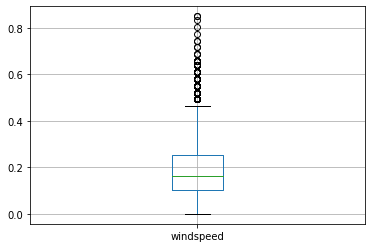

In [16]:
#realizando o boxplot 
no_null_for_dteday.boxplot(['windspeed'])

Resposta9: Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

###10- Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:

Resposta10: Possuem baixa correlação linear negativa.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


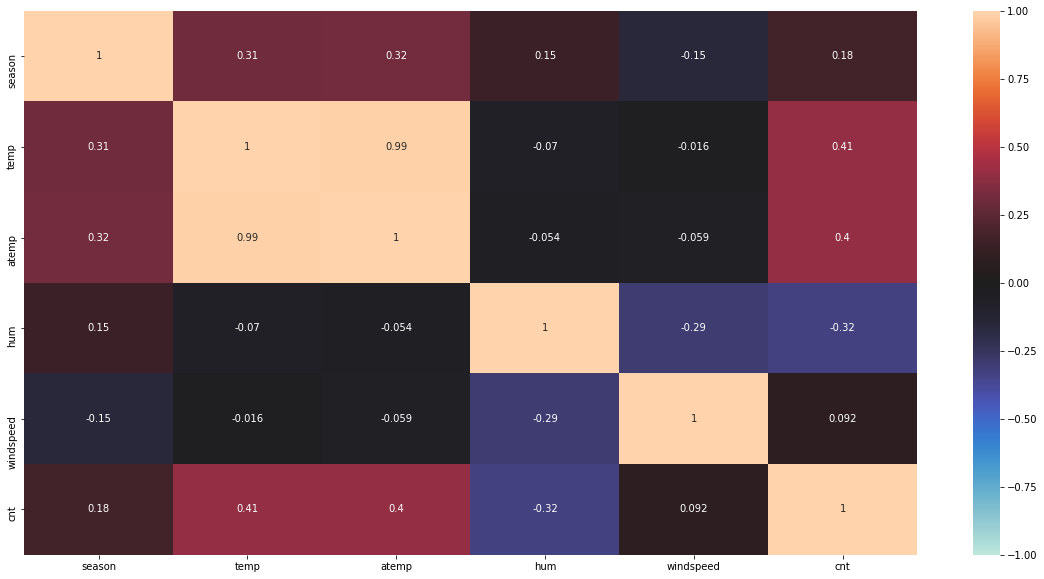

In [17]:
import matplotlib.pyplot as plt #realizando o plot da matriz de correlação
import seaborn as sn #biblioteca utilizada para os plots mais bonitos
df = no_null_for_dteday[["season", "temp", "atemp", "hum", "windspeed", "cnt"]]
plt.figure(figsize=(20, 10))
matriz_de_correlação = df.corr()  #construindo a matriz de correlação
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

In [20]:
# coloca media nos lugares nulos
df_bikes_2 = df_bikes
df_bikes_2['hum'].fillna(df_bikes["hum"].mean(), inplace=True)
df_bikes_2['cnt'].fillna(df_bikes["cnt"].mean(), inplace=True)
df_bikes_2['casual'].fillna(df_bikes["casual"].mean(), inplace=True)
df_bikes_2.isna().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum              0
windspeed     1738
casual           0
registered    1738
cnt              0
dtype: int64

In [0]:
#realizando a análise de regressão
x=df_bikes_2[['hum', 'casual']].values  #variável independente
Y=df_bikes_2['cnt'].values #variável dependente 

###11- Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.

In [22]:
from sklearn.linear_model import LinearRegression
#Realiza a construção do modelo de regressão
reg= LinearRegression()
regressao= reg.fit (x,Y) # encontra os coeficientes (realiza a regressão)

#realiza a previsão
previsao=reg.predict(x)

#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))
R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)


Y = [-100.98900093    2.20087962]X 174.98415936102225
Coeficiente de Determinação (R2): 0.40561165206692495


Resposta11: R2= 0,405

###12- Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".

In [25]:
from sklearn.tree import DecisionTreeRegressor
arvore_regressora=DecisionTreeRegressor() #define o objeto para a árvore de decisão como regressora
arvore_regressora.fit(x, Y) #aplica a regressão
#realiza a previsão
previsao_arvore=arvore_regressora.predict(x)

R_2 = r2_score(Y, previsao_arvore)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.6973174287156154


Resposta12: R2= 0,70

###13- Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:

Resposta13: O valor obtido pela árvore de decisão como regressor apresenta maior R2

###14- Com base na árvore de decisão é CORRETO afirmar:

Resposta14: Pode ser utilizada para classificação e regressão.



###15- Comparando o SVM com a árvore de decisão é CORRETO afirmar:

Resposta15: SVM encontra o hiperplano que gera a maior separação entre os dados.